This notebook contains the transformations performed on the polar performance data obtained from https://jieter.github.io/orc-data/site/#GRE/GRE1772 in order to obtain the speed lookup table BOAT_SPEEDS in `ompl_objectives.py`.

The raw speed values from `polar_sailing_speed_prediction_data` are loaded into a 2d array, transformed from knots to kmph, scaled down so that the maximum value is 10 kmph (because that is our estimate of sailbot's top speed), and then transposed to obtain the array you see printed beneath the next code cell.

In [14]:
import csv
import numpy as np

MAX_SPEED_KMPH = 10
KMPH_PER_KT = 1.852

with open("polar_sailing_speed_prediction_data", newline="") as f:
    reader = csv.reader(f, delimiter=";")
    rows = list(reader)

tws_kmph = np.array([float(x) for x in rows[0][1:]]) * KMPH_PER_KT
print("True Wind Speed Kmph")
print(tws_kmph)

boat_speeds = []

for row in rows[1:]:
    speeds_kmph = [float(x) * KMPH_PER_KT for x in row[1:]]
    boat_speeds.append(speeds_kmph)

boat_speeds = np.array(boat_speeds)
max_speed = boat_speeds.max()
boat_speeds = boat_speeds * (MAX_SPEED_KMPH / max_speed) # scale max speed to MAX_SPEED_KMPH

boat_speeds = np.round(boat_speeds, 1)

print("Boat Speeds")
print(boat_speeds.T)


True Wind Speed Kmph
[11.112 14.816 18.52  22.224 25.928 29.632 37.04 ]
Boat Speeds
[[ 0.   5.   5.4  5.8  6.1  6.   5.6  5.2  4.6  4.   3.6]
 [ 0.   5.9  6.5  6.9  7.2  7.1  6.8  6.5  5.9  5.3  4.8]
 [ 0.   6.6  7.3  7.7  8.1  8.1  7.8  7.5  6.9  6.3  5.8]
 [ 0.   7.2  7.9  8.4  8.7  8.8  8.6  8.4  7.8  7.2  6.7]
 [ 0.   7.7  8.4  8.7  9.   9.2  9.   8.9  8.5  8.   7.6]
 [ 0.   8.   8.7  9.   9.3  9.4  9.4  9.2  9.   8.6  8.3]
 [ 0.   8.2  8.9  9.3  9.6 10.  10.   9.8  9.6  9.3  9.2]]


The next cell plots the boat_speeds data obtained from the previous cell on a polar plot to show the data we will be using to predict sailbot's speed for any given true wind speed and sailing angle (true wind angle).

For reference, we should be expecting our data to have a similar shape to this sailing speed polar plot I grabbed from the internet.


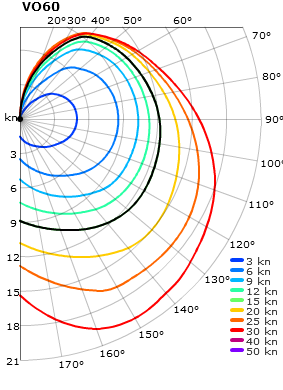

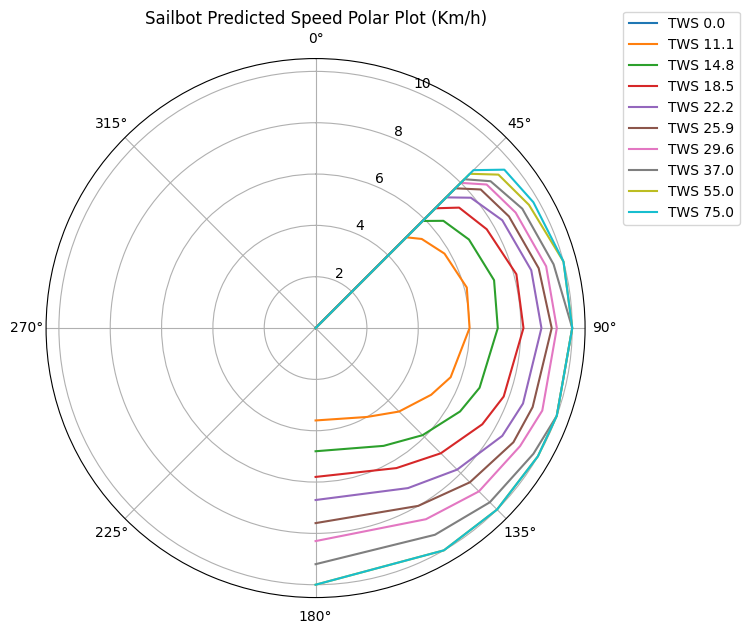

In [18]:
import numpy as np
import matplotlib.pyplot as plt

BOAT_SPEEDS = np.array(
    [
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 5., 5.4, 5.8, 6.1, 6., 5.6, 5.2, 4.6, 4., 3.6],
        [0., 5.9, 6.5, 6.9, 7.2, 7.1, 6.8, 6.5, 5.9, 5.3, 4.8],
        [0., 6.6, 7.3, 7.7, 8.1, 8.1, 7.8, 7.5, 6.9, 6.3, 5.8],
        [0., 7.2, 7.9, 8.4, 8.7, 8.8, 8.6, 8.4, 7.8, 7.2, 6.7],
        [0., 7.7, 8.4, 8.7, 9., 9.2, 9., 8.9, 8.5, 8., 7.6],
        [0., 8., 8.7, 9., 9.3, 9.4, 9.4, 9.2, 9., 8.6, 8.3],
        [0., 8.2, 8.9, 9.3, 9.6, 10., 10., 9.8, 9.6, 9.3, 9.2],
        [0., 8.5, 9.3, 9.6, 10., 10., 10., 10., 10., 10., 10.], # I added these two last rows manually
        [0., 8.7, 9.6, 9.8, 10., 10., 10., 10., 10., 10., 10.], # just to cover even higher wind speeds
    ]
)

TRUE_WIND_SPEEDS = [0., 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 37.0, 55.0, 75.0]
SAILING_ANGLES = [0, 45, 50, 60, 75, 90, 110, 120, 135, 150, 180]

angles_rad = np.deg2rad(SAILING_ANGLES)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="polar")

for i, tws in enumerate(TRUE_WIND_SPEEDS):
    ax.plot(angles_rad, BOAT_SPEEDS[i], label=f"TWS {tws}")

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Sailbot Predicted Speed Polar Plot (Km/h)")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()
